# Spam/ham classification

In this assignment you will train a classifier to recognise spam emails. The data was taken from this [enron spam](https://www.kaggle.com/wanderfj/enron-spam)  kaggle dataset. The dataset is described [here](https://www.researchgate.net/publication/221650814_Spam_Filtering_with_Naive_Bayes_-_Which_Naive_Bayes). This will familiarize you with tools  for text analysis  from  the scikit-learn library. 

The data is provided as a zip archive "enron_spam.zip". You can unpack it with command `unzip enron_spam.zip` which will create a directory `data`. 

The data  consists of 6 batches of emails. Each batch corresponds to different person and different spam source. Each batch is stored in different subdirectory of `data` named `Enron_1` to `Enron_6`. Each email is stored in separate file :( Spam and ham emails are stored in different subdirectories. Fortunatelly the scikit-learn library provides a functiona `load_files` that can read data in this format. 

In [1]:
from sklearn.datasets import load_files

In [2]:
import zipfile as zf 
files = zf.ZipFile("enron_spam.zip", 'r') 
files.extractall('data') 
files.close()

You can load data from given batch using the function

In [3]:
data1 = load_files('data/data/Enron_1/', encoding='latin-1', shuffle=True, categories=['ham', 'spam'] )

It returns a python dictionary. The entry 'data' contains the data from files and the entry 'target' contains the labels assigned according to the subdirectory names. The labels are integers and corresponding names can be found in the entry 'target_names'.

## Problems 

1. Train the multinomial bayes classifier using scikit-learn  for the first batch of data in data/Enron_1 as described in text_analysis notebook.
    1. Set asside 20% of data for testings and train the multinomial bayes classifier using the remaining 80% of data.This requires  transforming the data to feature vectors using CountVectoriser  from scikit-learn. How big is the resulting vocabulary ? 
    1. Using the test set 
        1. Draw the confusion matrix using `plot_confusion_matrix` from scikit-learn (see the latest update of the text_analysis notebook) using the test set. 
        1. Calculate recall and precision scores. 
        1. Draw the ROC curve and calculate the AUC score  using the test set. 
        1. What percentage of valid mails is classified as spam?
        1. Assuming that only mails classified as ham are put in our mailbox what percentage of mail in our inbox is spam?
        
    1. Find ten most probable and least probable words for each class.     
    1. Check the classifier on the remaining datasets data/Enron_2-6. For each set calculate recall and precision. 
    1. Combine all sets.  Train a new classifier on the combined  set, of course after dividing into test and train sets. Redo point B. using this classifier and combined test set. 
    1. Assumimg that we want to keep the frequency of misclassified ham mails belowe 5 per mile, what would be the percentage of spam in our inbox?
   

__Hint__ You can create a dataframe from the data using

## EXERCISE A

In [4]:
import pandas as pd
df1 = pd.DataFrame({'text': data1['data'], 'spam': data1['target']})

Here we split:

In [5]:
from sklearn.model_selection import train_test_split


train_data, test_data, train_labels, test_labels = train_test_split(df1['text'], df1['spam'], test_size=0.2)

In [6]:
print(len(train_data))

3309


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(train_data)
base_rating_classifier = MultinomialNB()
base_rating_classifier.fit(features, train_labels)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

We can calculate it using the shape of vectorizer or checking the length of vectorizer.get_feature_names():

In [8]:
vectorizer.get_feature_names()
print("Size of vocabulary:",features.shape[1])
print("Size of vocabulary:",len(vectorizer.get_feature_names()))

Size of vocabulary: 38980
Size of vocabulary: 38980


## EXERCISE B

## A)

We transform the test dataset and predict:

In [9]:
features_test = vectorizer.transform(test_data)
test_predicted =  base_rating_classifier.predict(features_test)



Printed values of confusion matrix, not normalized, normalized all (the four possible values sum 1) and normalized true (true label=1 sums 1 and true label=0 sums 1)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

confusion_m = confusion_matrix(test_labels, test_predicted)
confusion_m_a = confusion_matrix(test_labels, test_predicted, normalize = 'all')
confusion_m_t = confusion_matrix(test_labels, test_predicted, normalize = 'true')
print("Not normalized:")
print(confusion_m)
print("Normalized all:")
print(confusion_m_a)
print("Normalized true:")
print(confusion_m_t)

Not normalized:
[[585  11]
 [ 16 216]]
Normalized all:
[[0.70652174 0.01328502]
 [0.01932367 0.26086957]]
Normalized true:
[[0.98154362 0.01845638]
 [0.06896552 0.93103448]]


And now we have the same, but nicely plotted:

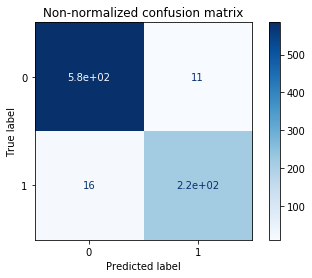

In [11]:
confusion_plot = plot_confusion_matrix(base_rating_classifier, features_test, test_labels,cmap=plt.cm.Blues)
plt.title("Non-normalized confusion matrix")
plt.show()

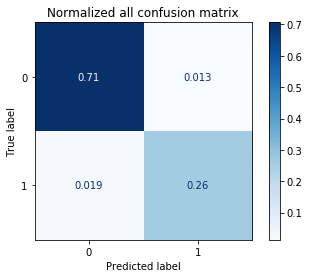

In [12]:
confusion_plot = plot_confusion_matrix(base_rating_classifier, features_test, test_labels,cmap=plt.cm.Blues, normalize='all')
plt.title("Normalized all confusion matrix")
plt.show()

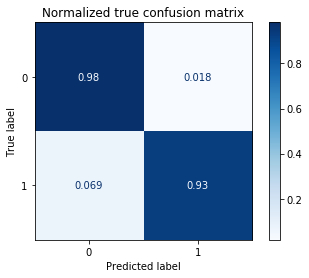

In [13]:
confusion_plot = plot_confusion_matrix(base_rating_classifier, features_test, test_labels,cmap=plt.cm.Blues, normalize='true')
plt.title("Normalized true confusion matrix")
plt.show()

And we can check that the printed values of confusion_m's are the same as the plotted, as it should be.

## B)

In [14]:

from sklearn.metrics import precision_score, recall_score

recall = recall_score(test_labels, test_predicted, average='macro') #ability of the classifier to find all the positive samples
precision = precision_score(test_labels, test_predicted, average='macro') #ability of the classifier not to label as positive a sample that is negative
print("Recall score:", recall)
print("Precision score",precision)

Recall score: 0.9562890534598473
Precision score 0.9624597770236096


We have pretty nice results.

## C)

We must the probabilities of the predictions. predict_proba returns an array of two columns. The first one is the probability of being a 0 and the second one is the probability of being a 1.

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

test_predicted_proba =  base_rating_classifier.predict_proba(features_test)
fprs, tprs, thds = roc_curve(test_labels, test_predicted_proba[:,1]) #we pick the probability of being 1
auc = roc_auc_score(test_labels, test_predicted_proba[:,1])
print("Thresholds:",thds)
print("AUC:",auc)

Thresholds: [2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 9.99999998e-001 9.99999998e-001
 9.99958153e-001 9.99955117e-001 9.99923698e-001 9.99908800e-001
 9.98915156e-001 9.98413406e-001 9.98331891e-001 9.97916886e-001
 9.95594986e-001 9.93592554e-001 9.11554265e-001 8.48851691e-001
 3.95644377e-001 3.68644305e-001 3.33672223e-001 2.52721624e-001
 1.88573060e-001 1.57942253e-001 3.69467326e-002 7.17760428e-003
 4.10230515e-003 1.39820461e-004 8.73226239e-005 2.26637467e-005
 1.81084958e-005 1.30129842e-019 1.19320848e-019 1.75621351e-022
 1.37524945e-022 5.41506814e-032 5.10088338e-032 3.00680053e-033
 1.82750062e-033 7.86283725e-136 5.49393504e-136 3.25058509e-151
 1.12369584e-152 1.62547597e-321 0.00000000e+000]
AUC: 0.9932018051376996


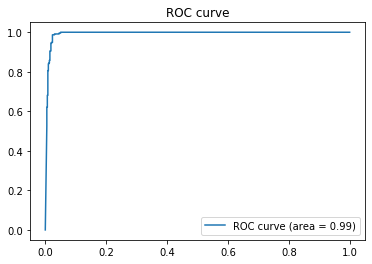

In [16]:
plt.plot(fprs,tprs,label= "ROC curve (area = %0.2f)" % auc)
plt.legend()
plt.title("ROC curve")
plt.show()

## D)

We could do this from scratch, dividing the valid emails categorized as spam by the total number of valid emails:

In [17]:
count_spam = 0
count_valid = 0
for i in range(len(test_predicted)):
    if test_labels.tolist()[i] == 0:
        count_valid += 1
        if test_predicted.tolist()[i] == 1:
         count_spam += 1
print("Total real valid emails",count_valid)        
print("Valid emails counted as spam",count_spam)
print("Percentage:",count_spam/count_valid)
    
    

Total real valid emails 596
Valid emails counted as spam 11
Percentage: 0.018456375838926176


Or we could use np.count_nonzero. I don't think the line requires much explanation:

In [18]:
import numpy as np
count_ = np.count_nonzero(test_predicted - test_labels == 1)/np.count_nonzero(test_labels == 0)
print("Percentage:",count_)

Percentage: 0.018456375838926176


## E)

In the code from scratch, we would just have to swap test_predicted and test_labels:

In [19]:
count_spam_3 = 0
count_valid_3 = 0
for i in range(len(test_predicted)):
    if test_predicted.tolist()[i] == 0:
        count_valid_3 += 1
        if test_labels.tolist()[i] == 1:
         count_spam_3 += 1
print("Total predicted valid emails",count_valid_3)        
print("Predicted valid emails that are actually spam",count_spam_3)
print("Percentage:",count_spam_3/count_valid_3)
    

Total predicted valid emails 601
Predicted valid emails that are actually spam 16
Percentage: 0.026622296173044926


Using count_nonzero, we have to swap again test_labels and test_predicted

In [20]:
import numpy as np
count_2 = np.count_nonzero(test_labels - test_predicted == 1)/np.count_nonzero(test_predicted == 0)
print("Percentage:",count_2)

Percentage: 0.026622296173044926


## EXERCISE C

We can calculate the log-probability of a word given a class. In this case, we have two possible classes (0 and 1), so if we use feature_log_prob_, we should expect two lists.

In [21]:
log_prob = base_rating_classifier.feature_log_prob_






Now we need to know to which word corresponds each probability. For this, we use get_feature_names(). We only need to know the words for some elements, so we can define the following function:



In [22]:
def word(i):
    return vectorizer.get_feature_names()[i]



And we need to "vectorize" the function:

In [23]:
word = np.vectorize(word)

What we can do now is sort log_prob in order to know the lowest and highest probabilities. We are interested in the position of these elements, so what we will use is np.argsort():

In [24]:
prob_arg=np.argsort(log_prob,axis=1)

Since argsort sorts in ascending order, the first ten elements of prob_sort_pos are the least probable, and the last ten are the most probable:

In [25]:
least_probable = prob_arg[:,0:10]
most_probable = prob_arg[:,-11:-1]

And now we can use the function "word" we defined to obtain the most and least probable words:

In [26]:
words_most = word(most_probable)
words_least = word(least_probable) 
print("Most probable words if ham:",words_most[0])
print("Most probable words if  spam:",words_most[1])
print("Least probable words if ham:",words_least[0])
print("Least probable words if  spam:",words_least[1])

Most probable words if ham: ['meter' 'cc' 'hpl' 'deal' 'gas' 'com' '2000' 'enron' 'subject' 'hou']
Most probable words if  spam: ['price' 'email' 'www' 'td' 'nbsp' '00' 'company' 'font' 'com' 'http']
Least probable words if ham: ['humiliate' 'lindberg' 'lind' 'limpid' 'limpet' 'limp' 'limotoronto'
 'limitedd' 'limitation' 'limerick']
Least probable words if  spam: ['requesting' 'louie' 'louise' 'sharon' 'sharma' 'sharkey' 'lounges'
 'browne' 'brownsville' 'shapiro']


And using Pandas we have:

In [27]:
import pandas as pd
pd.DataFrame({'Most probable if ham': words_most[0],
              'Most probable if spam': words_most[1],
              'Least probable if ham': words_least[0],
              'Least probable if spam': words_least[1]})

,Most probable if ham,Most probable if spam,Least probable if ham,Least probable if spam
0,meter,price,humiliate,requesting
1,cc,email,lindberg,louie
2,hpl,www,lind,louise
3,deal,td,limpid,sharon
4,gas,nbsp,limpet,sharma
5,com,00,limp,sharkey
6,2000,company,limotoronto,lounges
7,enron,font,limitedd,browne
8,subject,com,limitation,brownsville
9,hou,http,limerick,shapiro


I would say taht the second one makes sense, but I don't have an opinion on the rest.

## EXERCISE D

I will now load the data using a for loop. At the same time, in this for loop we will prepare each data set and predict its labels and scores. Apart from this, since we need all the data sets for the next exercise, I will use two lists called features_data and labels_data in which the features and labels of each data seat will be stored:

In [28]:
import os
new_files = os.listdir('data/data')
features_data=[]
labels_data=[]
for i in new_files:
 data_aux = load_files('data/data/' + i,encoding = 'latin-1',shuffle=True, categories =['ham','spam'])
 df_aux = pd.DataFrame({'text': data_aux['data'], 'spam': data_aux['target']})
 features_data.append(df_aux['text'])
 features_=vectorizer.transform(df_aux['text'])
 labels_ = df_aux['spam']
 labels_data.append(labels_)
 labels_predicted = base_rating_classifier.predict(features_)
 recall = recall_score(labels_, labels_predicted, average='macro')
 precision = precision_score(labels_, labels_predicted, average='macro')
 print("Recall score for the set",i,":",recall)
 print("Precision score for the set",i,":",precision)

Recall score for the set Enron_1 : 0.97750468164794
Precision score for the set Enron_1 : 0.9830528542561252
Recall score for the set Enron_2 : 0.946074930253769
Precision score for the set Enron_2 : 0.9129382813168627
Recall score for the set Enron_3 : 0.9716649787057234
Precision score for the set Enron_3 : 0.9514186618151812
Recall score for the set Enron_4 : 0.9358274289154395
Precision score for the set Enron_4 : 0.9242888701042548
Recall score for the set Enron_5 : 0.965187074829932
Precision score for the set Enron_5 : 0.9417860627881154
Recall score for the set Enron_6 : 0.9623611111111111
Precision score for the set Enron_6 : 0.9546324644543831


And the best score is for Enron_1, which makes sense, as it was the dataset that was used to train the classifier. However, all the scores are pretty good.

## EXERCISE E

The datasets are fully stored in the two lists we prepared in the previous exercise. However, we need to make those lists flat, as each dataset is inside a list itself. To do so, we can use the following lines:

In [29]:
features_total = [item for sublist in features_data for item in sublist]
labels_total =   [item for sublist in labels_data for item in sublist]

And now we basically copy the code from exercise B changing the variable names:

In [30]:
train_data_total, test_data_total, train_labels_total, test_labels_total = train_test_split(features_total, labels_total, test_size=0.2)

In [31]:
vectorizer_new = CountVectorizer(stop_words='english')
features_total_transform = vectorizer.fit_transform(train_data_total)
base_rating_classifier_total = MultinomialNB()
base_rating_classifier_total.fit(features_total_transform, train_labels_total)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## A)

In [32]:
features_test_total_transform = vectorizer.transform(test_data_total)
test_predicted_total =  base_rating_classifier_total.predict(features_test_total_transform)

This time I will only plot the confusion matrices:

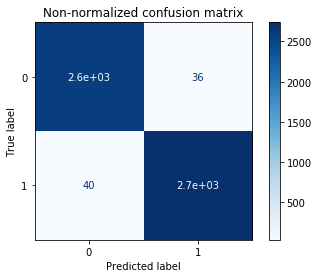

In [33]:
confusion_plot = plot_confusion_matrix(base_rating_classifier_total, features_test_total_transform, test_labels_total,cmap=plt.cm.Blues)
plt.title("Non-normalized confusion matrix")
plt.show()

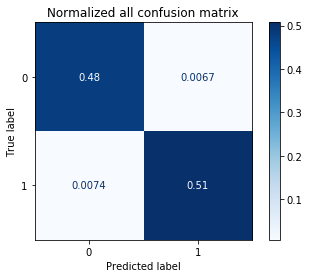

In [34]:
confusion_plot = plot_confusion_matrix(base_rating_classifier_total, features_test_total_transform, test_labels_total,cmap=plt.cm.Blues, normalize='all')
plt.title("Normalized all confusion matrix")
plt.show()

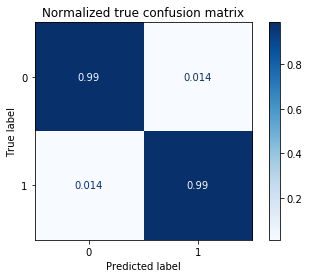

In [35]:
confusion_plot = plot_confusion_matrix(base_rating_classifier_total, features_test_total_transform, test_labels_total,cmap=plt.cm.Blues, normalize='true')
plt.title("Normalized true confusion matrix")
plt.show()

## B)

Now we check the scores:

In [36]:
recall_total = recall_score(test_labels_total, test_predicted_total, average='macro') #ability of the classifier to find all the positive samples
precision_total = precision_score(test_labels_total, test_predicted_total, average='macro') #ability of the classifier not to label as positive a sample that is negative
print("Recall score:", recall_total)
print("Precision score",precision_total)

Recall score: 0.9859198787353237
Precision score 0.9858781598817727


And we see that we gain around 0.01 in score, which is a lot in this case.

## C)

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

test_predicted_proba_total =  base_rating_classifier_total.predict_proba(features_test_total_transform)
fprs_t, tprs_t, thds_t = roc_curve(test_labels_total, test_predicted_proba_total[:,1]) #we pick the probability of being 1
auc_t = roc_auc_score(test_labels_total, test_predicted_proba_total[:,1])
print("Thresholds:",thds_t)
print("AUC:",auc_t)

Thresholds: [2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 9.99999999e-001 9.99999999e-001 9.99999998e-001
 9.99999998e-001 9.99999998e-001 9.99999998e-001 9.99999996e-001
 9.99999996e-001 9.99999995e-001 9.99999995e-001 9.99999995e-001
 9.99999995e-001 9.99999969e-001 9.99999967e-001 9.99999950e-001
 9.99999949e-

And we see that the AUC is actually worse this time. However, we can see that the difference is in the fourt decimal. I would guess that
if we took different trainsets and calculate the AUC average, the one with the complete dataset would be better.

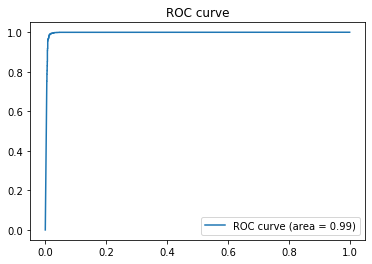

In [38]:
plt.plot(fprs_t,tprs_t,label= "ROC curve (area = %0.2f)" % auc)
plt.legend()
plt.title("ROC curve")
plt.show()

## D)

In [39]:
count_spam_t = 0
count_valid_t = 0
for i in range(len(test_predicted_total)):
    if test_labels_total[i] == 0:
        count_valid_t += 1
        if test_predicted_total[i] == 1:
         count_spam_t += 1
print("Total real valid emails",count_valid_t)        
print("Valid emails counted as spam",count_spam_t)
print("Percentage:",count_spam_t/count_valid_t)
    

Total real valid emails 2617
Valid emails counted as spam 36
Percentage: 0.013756209400076424


With count_nonzero:

In [54]:
import numpy as np
count_t = np.count_nonzero(test_predicted_total - test_labels_total == 1)/np.count_nonzero(np.array(test_labels_total) == 0)
print("Percentage:",count_t)

Percentage: 0.013756209400076424


## E)

In [55]:
count_spam_3_t = 0
count_valid_3_t = 0
for i in range(len(test_predicted_total)):
    if test_predicted_total[i] == 0:
        count_valid_3_t += 1
        if test_labels_total[i] == 1:
         count_spam_3_t += 1
print("Total predicted valid emails",count_valid_3_t)        
print("Predicted valid emails that are actually spam",count_spam_3_t)
print("Percentage:",count_spam_3_t/count_valid_3_t)

Total predicted valid emails 2621
Predicted valid emails that are actually spam 40
Percentage: 0.015261350629530714


With count_nonzero:

In [56]:
import numpy as np
count_t_2 = np.count_nonzero(test_labels_total - test_predicted_total == 1)/np.count_nonzero(test_predicted_total == 0)
print("Percentage:",count_t_2)

Percentage: 0.015261350629530714


## EXERCISE F

We are told that 0.5% of the ham mails are misclassified. If we consider ham as negative (0), this means that we have a False Positive Rate of 0.005. 

We are asked to calculate the rate of spam in our inbox, which is the False Negative Rate.

We know that FNR + TPR = 1, and if we have the FPR, we have calculate the TPR using the ROC curve, so we would have the FNR.

I think there is not a function that gives the coordinates of the ROC curve, so what we can do instead is recall fprs_t and see which element is closer to 0.005. Once we know its position, we can check its associated TPR,and finally calculate the FNR.

Another option would be using a a widget and use a cursor to manually check the coordinates in the ROC curve.



In [68]:
tpr_ = tprs_t[np.where(np.round(fprs_t,3) == 0.005)]
print(tpr_)

[0.71696075 0.71912135 0.71948145 0.72488297 0.72596327 0.72920418
 0.72956428 0.73136478 0.73604609 0.7374865  0.7382067  0.7396471
 0.7403673  0.7407274  0.74180771 0.74288801 0.74432841 0.74468851
 0.74612892 0.74828952 0.74864962 0.74936982 0.74972992 0.75045013
 0.75081023 0.75189053 0.75261073 0.75261073 0.75369103 0.75513144
 0.75693194 0.75765214 0.76773497 0.76845517 0.76953547 0.77025567
 0.77601728 0.77673749 0.78537991 0.78610011 0.78790061]


As we can see, if we round to 3 decimals (0.005), we have many TPR that are associated to a FPR=0.005, so we can take the mean of the first one and last one:

In [70]:
mean=(tpr_[0]+tpr_[-1])/2


And the FNR is:

In [73]:
fnr_ = 1-mean
print("Spam in inbox rate:",fnr_)

Spam in inbox rate: 0.2475693194094346


If we use the widget:

In [75]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from matplotlib.widgets import Cursor, Button
%matplotlib widget
fig,ax =plt.subplots()
plt.plot(fprs_t,tprs_t,label= "ROC curve (area = %0.2f)" % auc)
plt.legend()
plt.title("ROC curve")
cursor=Cursor(ax,horizOn=True,vertOn=True,color='green',linewidth=0.5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [76]:
print("Spam in inbox rate:",1-0.752611)

Spam in inbox rate: 0.24738899999999997
